----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd         # Para manejo de datos
import numpy as np          # Para operaciones numéricas
import matplotlib.pyplot as plt   # Para visualización de datos
import seaborn as sns       # Para visualizaciones más atractivas
from scipy import stats as st   # Para pruebas estadísticas

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [3]:
# Explorar la tabla users
print(users.info())
print(users.head())

# Explorar la tabla calls
print(calls.info())
print(calls.head())

# Explorar la tabla messages
print(messages.info())
print(messages.head())

# Explorar la tabla internet
print(internet.info())
print(internet.head())

# Explorar la tabla plans
print(plans.info())
print(plans.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40   

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print(plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [5]:
# Imprime una muestra de los datos para las tarifas

print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

***Cantidad de datos***:

 - Solo hay 2 registros: uno para la tarifa surf y otro para ultimate.
 - No hay valores nulos (todos los campos tienen 2 valores completos).
 - Tiene 8 columnas que describen las características de cada plan:
    - 'messages_included': SMS incluidos.
    - 'mb_per_month_included': Megabytes incluidos por mes.
    - 'minutes_included': Minutos de llamadas incluidos por mes.
    - 'usd_monthly_pay': Pago mensual en dólares.
    - 'usd_per_gb': Precio por GB adicional.
    - 'usd_per_message': Precio por SMS adicional.
    - 'usd_per_minute': Precio por minuto adicional.
    - 'plan_name': Nombre del plan.
    
    
***Tipos de datos***:

 - Enteros (int64) para la mayoría de columnas numéricas.
 - Flotantes (float64) para precios unitarios que podrían tener decimales ('usd_per_message', 'usd_per_minute').
 - Objeto (object) para 'plan_name' (nombre del plan).
 - No hay valores ausentes: todas las columnas tienen valores completos para ambas tarifas.
 
 
**No se necesitan cambios**.


## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [6]:
#No se necesitan corregir los datos

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Actualmente, el campo 'mb_per_month_included' está en megabytes.
Como después Megaline cobra por gigabytes, puede ser más práctico agregar una columna 'gb_per_month_included'.

In [7]:
# Agregar columna de gigabytes incluidos al mes
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(users.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [9]:
# Imprime una muestra de datos para usuarios
print(users.head())


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Columnas y tipos de datos**:

- 'user_id': int64 — Correcto, es un identificador numérico.
- 'first_name' y 'last_name': object — Correcto, son nombres en texto.
- 'age: int64' — Correcto, la edad es un número entero.
- 'city': object — Correcto, ciudades como texto.
- 'reg_date': object 
    - Problema: debería ser de tipo datetime, no objeto.
- 'plan': object — Correcto, texto para indicar la tarifa (surf o ultimate).
- 'churn_date': object
    - Problema: debería ser de tipo datetime, no objeto. Además, tiene muchos valores nulos (solo 34 usuarios tienen una fecha de baja).


**Valores ausentes**:

- 'churn_date' tiene muchos valores nulos (466/500 usuarios siguen activos).

    *Esto es esperado y no requiere imputación. El valor nulo simplemente significa que el usuario no se ha dado de baja*.


**Muestra de datos (primeras filas)**:

- Los valores de 'user_id', 'first_name', 'last_name', 'city', 'plan' y 'age' se ven coherentes.
- 'reg_date' y 'churn_date' se ven bien en el formato, pero necesitan conversión de tipo.


**Problema vs. Solución**
- Tipo de 'reg_date': Es object, debería ser datetime64. Hay que convertirlo usando pd.to_datetime().
- Tipo de 'churn_date': Es object, debería ser datetime64. Hay que convertirlo usando pd.to_datetime().
- Valores nulos en 'churn_date': No es un error. No hay que corregir nada, simplemente tenerlo en cuenta.


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [10]:
# Convertir reg_date y churn_date a tipo datetime
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

**Crear columna 'reg_month'**:
- Para analizar mes de registro de cada usuario. Quizás los usuarios de ciertos meses se comportan diferente.

**Crear 'columna is_active'**:
- Para saber si el usuario sigue activo (no tiene 'churn_date'). Será importante para calcular usuarios vigentes mes a mes.

In [11]:
# Crear columna reg_month (mes de registro)
users['reg_month'] = users['reg_date'].dt.month

# Crear columna is_active (1 = activo, 0 = se dio de baja)
users['is_active'] = users['churn_date'].isna().astype(int)

## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(calls.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [13]:
# Imprime una muestra de datos para las llamadas
print(calls.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Columnas y tipos de datos**:
- 'id': object — Correcto (identificador único de llamada).
- 'user_id': int64 — Correcto (identificador del usuario que hizo la llamada).
- 'call_date': object
    - Problema: debería ser datetime para análisis temporal.
- 'duration': float64 — Correcto, pero recuerda que las llamadas deben ser facturadas por minutos enteros, no por decimales.
    - Problema: Vemos duraciones como 8.52, 13.66, 14.48, 5.76, etc. Esto confirma que los minutos deben redondearse hacia arriba porque Megaline cobra el minuto completo aunque la llamada dure solo unos segundos.


**Datos faltantes**:
- No hay datos nulos. 


**Problema vs. Solución**:
- 'call_date' es de tipo object. Hay que convertirlo a datetime64.
- 'duration' tiene decimales: Debemos redondear hacia arriba usando 'np.ceil()' para reflejar cómo Megaline factura.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [14]:
# Convertir 'call_date' a tipo datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Redondear duración de cada llamada hacia arriba y convertir a entero
calls['duration'] = np.ceil(calls['duration']).astype(int)

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Crear la columna 'month' a partir de 'call_date' para agrupar llamadas por usuario y mes y analizar el comportamiento mensual.

In [15]:
# Crear la columna 'month' a partir de 'call_date'
calls['month'] = calls['call_date'].dt.month

## Mensajes

In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [17]:
# Imprime una muestra de datos para los mensajes
print(messages.head())


         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Columnas y tipos de datos**:
- 'id': object — Correcto, identificador único de cada SMS.
- 'user_id': int64 — Correcto, identificador del usuario que envió el SMS.
- 'message_date': object
    - Problema: debería ser de tipo datetime64 para hacer análisis temporal (mes, etc.).


**Datos faltantes**:

No hay valores nulos.

**Problema vs.Solución**
- 'message_date' es object y debería ser datetime para poder extraer mes, año, etc. Debemos convertirlo usando 'pd.to_datetime()'.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
# Convertir 'message_date' a tipo datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Agregar una columna 'month' extraída de 'message_date', para que después podamos agrupar los SMS por usuario y mes.

Esto será necesario para:

- Saber cuántos mensajes manda cada usuario al mes.
- Comparar el uso de SMS contra el límite incluido en su tarifa.

In [19]:
# Crear columna 'month' a partir de 'message_date'
messages['month'] = messages['message_date'].dt.month

## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(internet.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [21]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head())


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

**Columnas y tipos de datos**:
- 'id: object' — Correcto, identificador único de la sesión.
- 'user_id': int64 — Correcto, ID del usuario.
- 'session_date': object
    - Problema: debería ser datetime64 para análisis temporal (por mes, etc.).
- 'mb_used': float64 — Correcto, volumen de datos consumidos en megabytes.


**Datos faltantes**:

No hay valores nulos en ninguna columna.


**Muestra de datos**:

Se observan algunas sesiones de 0 MB (mb_used = 0.00), lo cual puede ser normal si un usuario se conectó pero no descargó datos.


**Problema vs. Solución**
- 'session_date' es object y debería ser datetime64 para poder agrupar por mes. Debemos convertir usando 'pd.to_datetime()'.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [22]:
# Convertir 'session_date' a tipo datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

- Crear columna 'month' a partir de 'session_date' para agrupar el tráfico por usuario y mes.

- Crear columna 'gb_used' redondeando hacia arriba el consumo en GB ya que Megaline cobra el tráfico por gigabytes enteros (no por MB).


In [23]:
# Crear columna 'month' a partir de 'session_date'
internet['month'] = internet['session_date'].dt.month

# Sumar megabytes consumidos por usuario y mes
internet_per_month = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()

# Crear nueva columna con tráfico mensual en GB redondeado hacia arriba
internet_per_month['gb_per_month'] = np.ceil(internet_per_month['mb_used'] / 1024).astype(int)


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [25]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_month = calls.groupby(['user_id', 'month']).agg({'id':'count'}).rename(columns={'id':'calls_per_month'})


In [26]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_month = calls.groupby(['user_id', 'month']).agg({'duration':'sum'}).rename(columns={'duration':'minutes_per_month'})


In [27]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_month = messages.groupby(['user_id', 'month']).agg({'id':'count'}).rename(columns={'id':'messages_per_month'})


In [28]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Agrupar megabytes usados por usuario y mes
internet_per_month = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()

internet_per_month['gb_per_month'] = np.ceil(internet_per_month['mb_used'] / 1024).astype(int)



[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [29]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Fusionar usando 'merge' por columnas 'user_id' y 'month'
user_monthly = calls_per_month.merge(minutes_per_month, on=['user_id', 'month'], how='outer') \
                              .merge(messages_per_month, on=['user_id', 'month'], how='outer') \
                              .merge(internet_per_month[['user_id', 'month', 'gb_per_month']], on=['user_id', 'month'], how='outer')

# Rellenar valores nulos con 0
user_monthly = user_monthly.fillna(0)



In [30]:
# Añade la información de la tarifa

# Unir la información de la tarifa
user_monthly = user_monthly.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Unir con la tabla de planes para conocer límites y precios
user_monthly = user_monthly.merge(plans, left_on='plan', right_on='plan_name', how='left')


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [31]:
# Calcula el ingreso mensual para cada usuario
# Cálculo del consumo que supera lo incluido en el plan
user_monthly['minutes_over'] = (user_monthly['minutes_per_month'] - user_monthly['minutes_included']).clip(lower=0)
user_monthly['messages_over'] = (user_monthly['messages_per_month'] - user_monthly['messages_included']).clip(lower=0)
user_monthly['gb_over'] = (user_monthly['gb_per_month'] - (user_monthly['mb_per_month_included'] / 1024)).clip(lower=0)

# Cálculo de ingresos por exceso
user_monthly['revenue'] = (
    user_monthly['usd_monthly_pay'] +
    user_monthly['minutes_over'] * user_monthly['usd_per_minute'] +
    user_monthly['messages_over'] * user_monthly['usd_per_message'] +
    user_monthly['gb_over'] * user_monthly['usd_per_gb']
)


In [32]:
# Verificar que tenemos todas las columnas principales
print(user_monthly.columns)

# Verificar que no haya valores nulos inesperados (excepto en columnas relacionadas a tarifas si algún usuario no está vinculado)
print(user_monthly.isna().sum())

# Verificar algunos ejemplos concretos: visualizar las primeras filas
print(user_monthly.head())

# Verificar que los tipos de datos sean correctos
print(user_monthly.dtypes)

# Verificar que la columna revenue no sea negativa
print('Revenue negativo:', (user_monthly['revenue'] < 0).sum())

# Verificar que no haya minutos, SMS o GB negativos (antes de facturar)
print('Minutes_per_month negativos:', (user_monthly['minutes_per_month'] < 0).sum())
print('Messages_per_month negativos:', (user_monthly['messages_per_month'] < 0).sum())
print('Gb_per_month negativos:', (user_monthly['gb_per_month'] < 0).sum())

# Verificar usuarios que más consumen (top 5)
print(user_monthly.sort_values('revenue', ascending=False).head())


Index(['user_id', 'month', 'calls_per_month', 'minutes_per_month',
       'messages_per_month', 'gb_per_month', 'plan', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name',
       'gb_per_month_included', 'minutes_over', 'messages_over', 'gb_over',
       'revenue'],
      dtype='object')
user_id                  0
month                    0
calls_per_month          0
minutes_per_month        0
messages_per_month       0
gb_per_month             0
plan                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
gb_per_month_included    0
minutes_over             0
messages_over            0
gb_over                  0
revenue                  0
dtype: int64
   user_id  month  calls_per_month  minutes_per

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

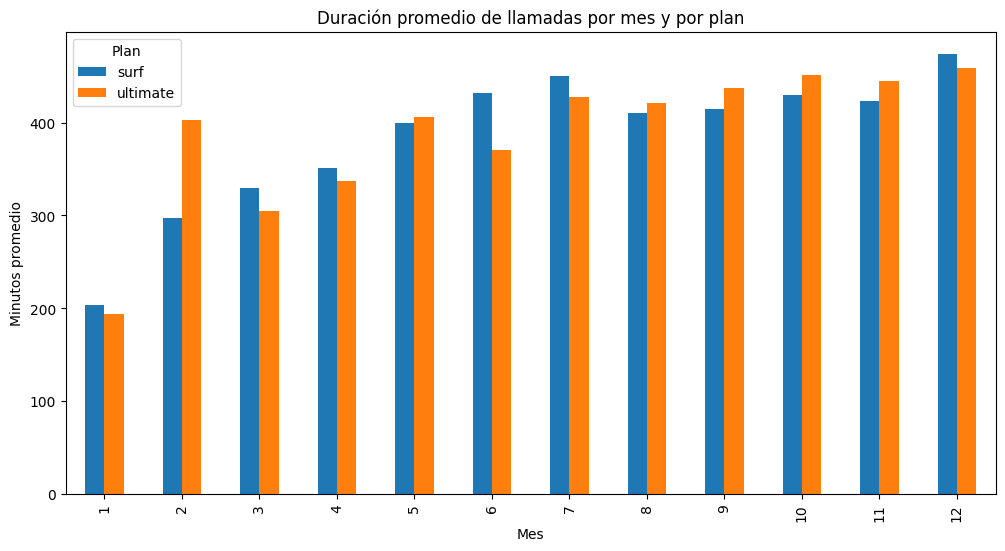

In [33]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
calls_by_month_plan = user_monthly.groupby(['plan', 'month'])['minutes_per_month'].mean().unstack()

# Gráfico de barras
calls_by_month_plan.T.plot(kind='bar', figsize=(12,6))
plt.title('Duración promedio de llamadas por mes y por plan')
plt.xlabel('Mes')
plt.ylabel('Minutos promedio')
plt.legend(title='Plan')
plt.show()

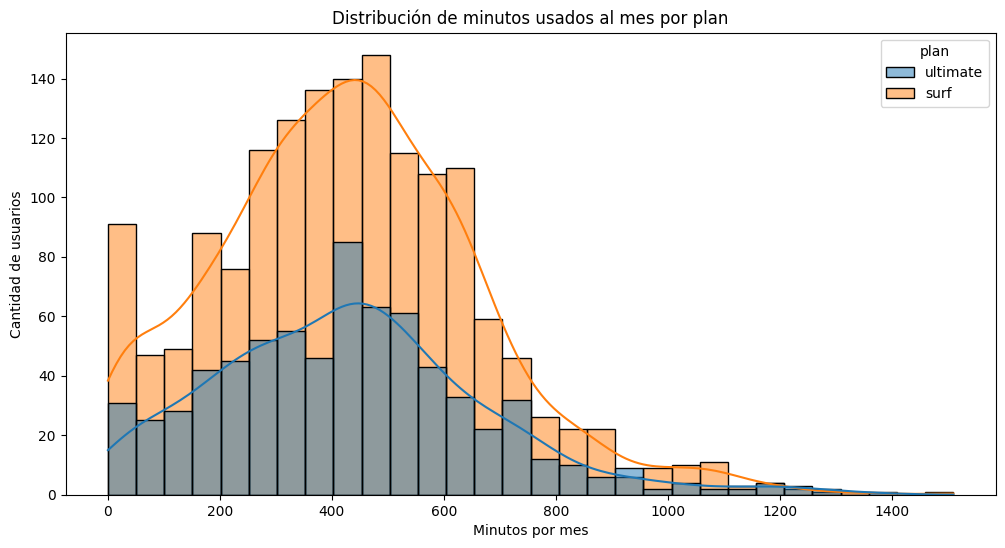

In [34]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
plt.figure(figsize=(12,6))
sns.histplot(data=user_monthly, x='minutes_per_month', hue='plan', kde=True, bins=30)
plt.title('Distribución de minutos usados al mes por plan')
plt.xlabel('Minutos por mes')
plt.ylabel('Cantidad de usuarios')
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [35]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print(user_monthly.groupby('plan')['minutes_per_month'].agg(['mean', 'var']))


                mean           var
plan                              
surf      428.749523  54968.279461
ultimate  430.450000  57844.464812


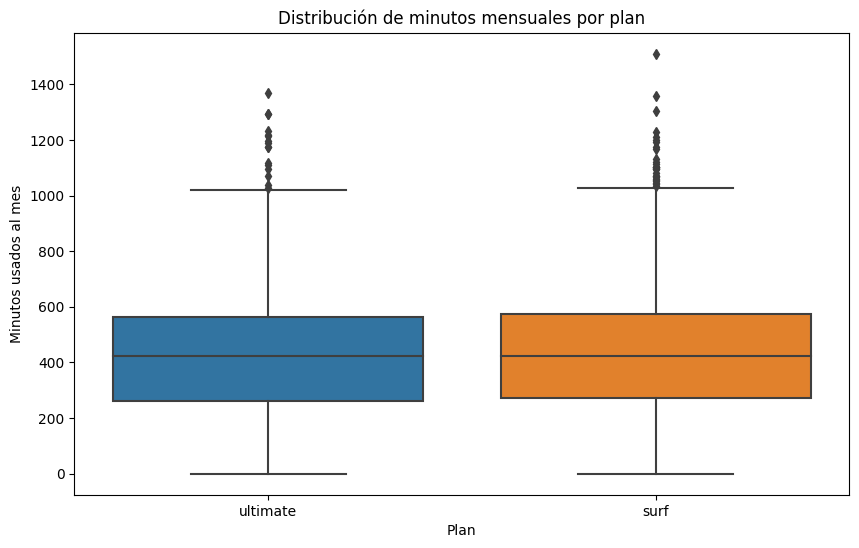

In [36]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10,6))
sns.boxplot(x='plan', y='minutes_per_month', data=user_monthly)
plt.title('Distribución de minutos mensuales por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos usados al mes')
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

 1. **Duración promedio de llamadas por mes y por plan.**

- Ambos planes (Surf y Ultimate) muestran un aumento progresivo en el promedio de minutos usados a medida que avanza el año.
- Ultimate tiende a tener ligeramente más minutos promedio durante 2 meses de la primera mitad del año (febrero y mayo) y 4 meses durante la segunda mitad (agosto, septiembre, octubre y noviembre).
- Surf alcanza o incluso supera ligeramente a Ultimate en el resto de los meses.
- La diferencia de uso entre planes no es muy grande mes a mes, pero existe cierta variabilidad con excepción de Febrero en la que la diferencia si es mas amplia.

**Conclusión**:
El uso promedio de minutos es similar entre usuarios de Surf y Ultimate, aunque con ligeras diferencias por temporada.


 2. **Distribución de minutos usados al mes por plan.**

- Ultimate tiene una distribución más concentrada entre los 300 a 600 minutos al mes.
- Surf tiene una distribución más dispersa, con más usuarios usando entre 200 a 600 minutos pero también extendiéndose más allá (700+, incluso hasta 1400 minutos).
- Hay más usuarios de Surf que presentan uso extremo (muchos minutos), lo cual genera más variabilidad.

**Conclusión**:
- Los usuarios de Surf tienden a tener un comportamiento más variable en minutos usados.
- Ultimate tiene usuarios más concentrados en un rango medio de minutos.

 3. **Distribución de minutos mensuales por plan.**
 

- Ambos planes tienen:
    - Una mediana (línea central) de minutos similar, alrededor de 400–450 minutos por mes.
    - Surf muestra más usuarios que usan muchísimo más minutos, hasta 1400.
    - El tamaño de la caja es similar, pero Surf parece tener una dispersión un poco mayor.
    
**Conclusión**:
La dispersión de minutos es mayor en Surf, donde algunos usuarios usan muchos más minutos que los usuarios promedio.
Ultimate es más predecible en su uso.

### Mensajes

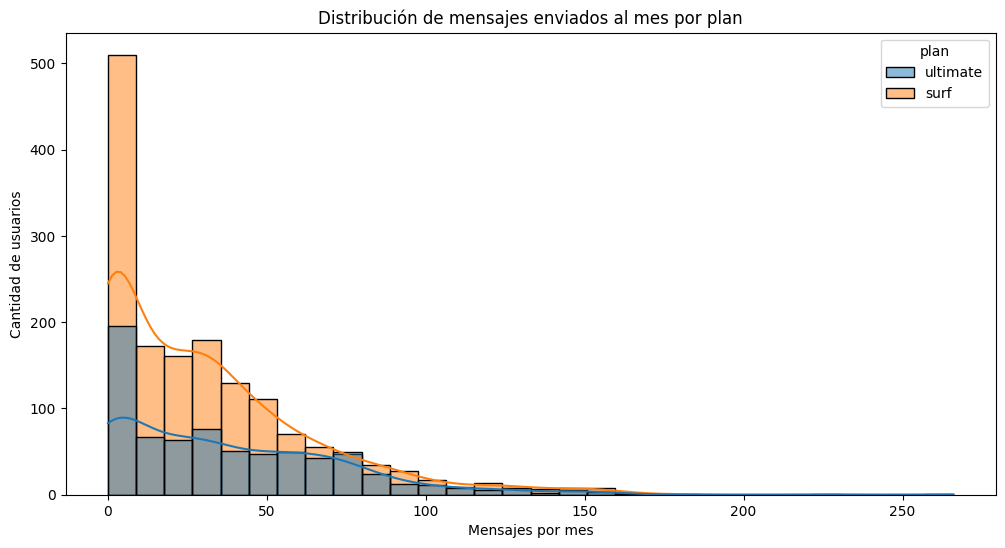

In [37]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Histograma de mensajes enviados
plt.figure(figsize=(12,6))
sns.histplot(data=user_monthly, x='messages_per_month', hue='plan', kde=True, bins=30)
plt.title('Distribución de mensajes enviados al mes por plan')
plt.xlabel('Mensajes por mes')
plt.ylabel('Cantidad de usuarios')
plt.show()


In [38]:
# Media y varianza de mensajes
print(user_monthly.groupby('plan')['messages_per_month'].agg(['mean', 'var']))

               mean          var
plan                            
surf      31.159568  1126.724522
ultimate  37.551389  1208.756744


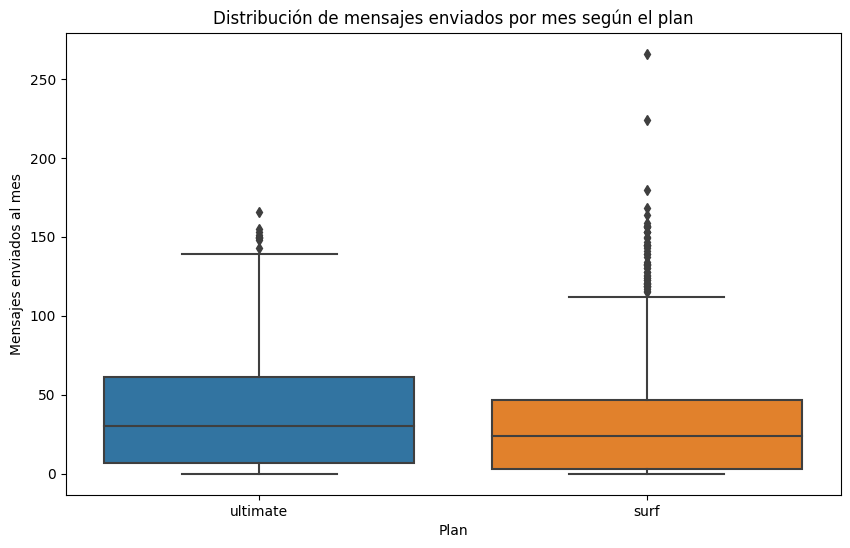

In [39]:
# Diagrama de caja de mensajes enviados por mes
plt.figure(figsize=(10,6))
sns.boxplot(x='plan', y='messages_per_month', data=user_monthly)
plt.title('Distribución de mensajes enviados por mes según el plan')
plt.xlabel('Plan')
plt.ylabel('Mensajes enviados al mes')
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

1. **Distribución de mensajes enviados al mes por plan**.

- La mayoría de los usuarios de ambos planes (Surf y Ultimate) envían muy pocos mensajes al mes (de 0 a 50).
- Después de 50 mensajes, el número de usuarios disminuye drásticamente en ambos planes.
- La diferencia entre la cantidad de usuarios entre Ultimate y surf se disminuye considerablemente en los rangos superiores.
- Ambos planes tienen una distribución asimétrica a la derecha (sesgada hacia mayores valores).

**Conclusión**:
La mayoría de los usuarios no usan mucho los SMS.
Ultimate tiene usuarios que tienden a enviar ligeramente más mensajes, pero en general el uso de SMS es bajo en ambos planes.

2. **Distribución de mensajes enviados por mes según el plan.**

- Las medianas de mensajes enviados en ambos planes son bajas (cerca de 20-30 SMS al mes).
- Ultimate tiene una mediana más alta que Surf, confirmando que en promedio envían más mensajes.
- Hay más usuarios que envían más de 100–150 mensajes al mes (especialmente visibles en Surf).


**Conclusión**:
Ultimate tiene un uso promedio de mensajes más alto, pero Surf presenta mayor cantidad de usuarios que envían muchísimos mensajes en algunos meses.

### Internet

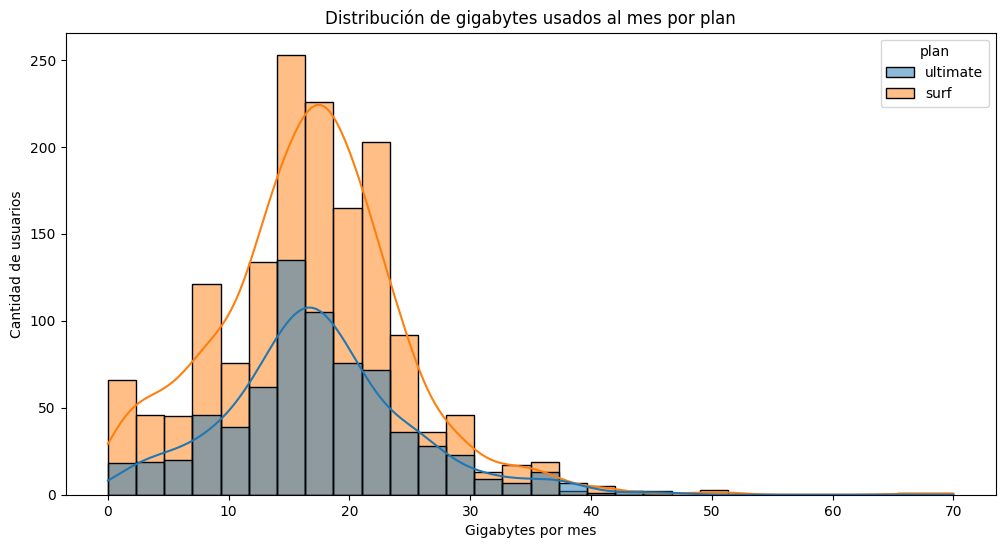

In [40]:
# Histograma de consumo de internet
plt.figure(figsize=(12,6))
sns.histplot(data=user_monthly, x='gb_per_month', hue='plan', kde=True, bins=30)
plt.title('Distribución de gigabytes usados al mes por plan')
plt.xlabel('Gigabytes por mes')
plt.ylabel('Cantidad de usuarios')
plt.show()


In [41]:
# Media y varianza de GB usados
print(user_monthly.groupby('plan')['gb_per_month'].agg(['mean', 'var']))

               mean       var
plan                         
surf      16.670693  61.58360
ultimate  17.306944  58.83055


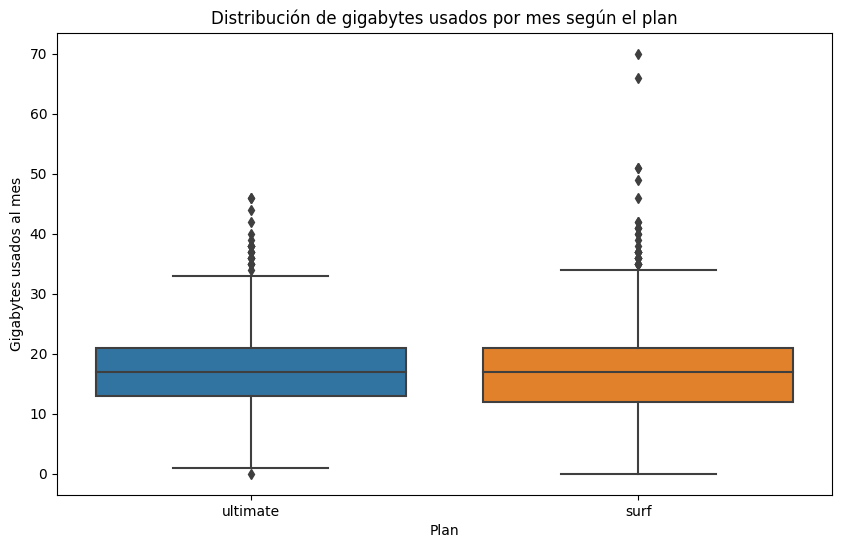

In [42]:
# Diagrama de caja del consumo de internet por mes
plt.figure(figsize=(10,6))
sns.boxplot(x='plan', y='gb_per_month', data=user_monthly)
plt.title('Distribución de gigabytes usados por mes según el plan')
plt.xlabel('Plan')
plt.ylabel('Gigabytes usados al mes')
plt.show()


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

1. **Distribución de gigabytes usados al mes por plan.**

- Ambos planes (Surf y Ultimate) tienen un comportamiento similar en cuanto al uso de datos.
- El pico de consumo en ambos planes está alrededor de los 17-20 GB por mes.
- El plan Surf tiene una distribución más dispersa:
    - Usuarios de Surf tienden a consumir un rango más amplio de datos, algunos llegando a más de 60–70 GB al mes.
- El plan Ultimate tiene una concentración de usuarios que consumen entre 10 y 25 GB, mostrando un patrón más uniforme y estable.

**Conclusión**:
- Surf tiende a una mayor variabilidad en el consumo de datos.
- Ultimate muestra un comportamiento más controlado y concentrado.


2. **Distribución de gigabytes usados por mes según el plan.**

- Las medianas son bastante similares en ambos planes (alrededor de 18 GB/mes).
- Ambos planes presentan una dispersión similar, sin embargo, Surf muestra más usuarios con consumos extremos.
- En Surf, hay usuarios que superan los 60–70 GB al mes.
- En Ultimate, el consumo máximo de la mayoría de usuarios se mantiene debajo de 50 GB.

**Conclusión**:
- Aunque la mediana es similar, Surf exhibe mayor dispersión y más extremos de consumo.
- Ultimate ofrece un patrón de uso más controlado y predecible.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

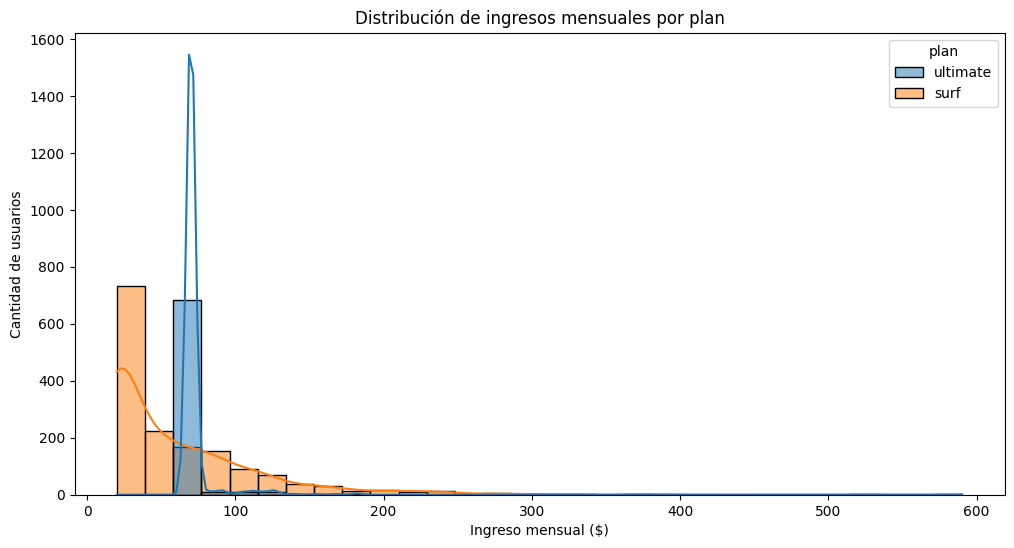

In [43]:
# Histograma de ingresos
plt.figure(figsize=(12,6))
sns.histplot(data=user_monthly, x='revenue', hue='plan', kde=True, bins=30)
plt.title('Distribución de ingresos mensuales por plan')
plt.xlabel('Ingreso mensual ($)')
plt.ylabel('Cantidad de usuarios')
plt.show()


In [44]:
# Media, varianza, desviación estándar de ingresos por plan
print(user_monthly.groupby('plan')['revenue'].agg(['mean', 'var', 'std']))

               mean          var        std
plan                                       
surf      60.706408  3067.835152  55.388042
ultimate  72.313889   129.848486  11.395108


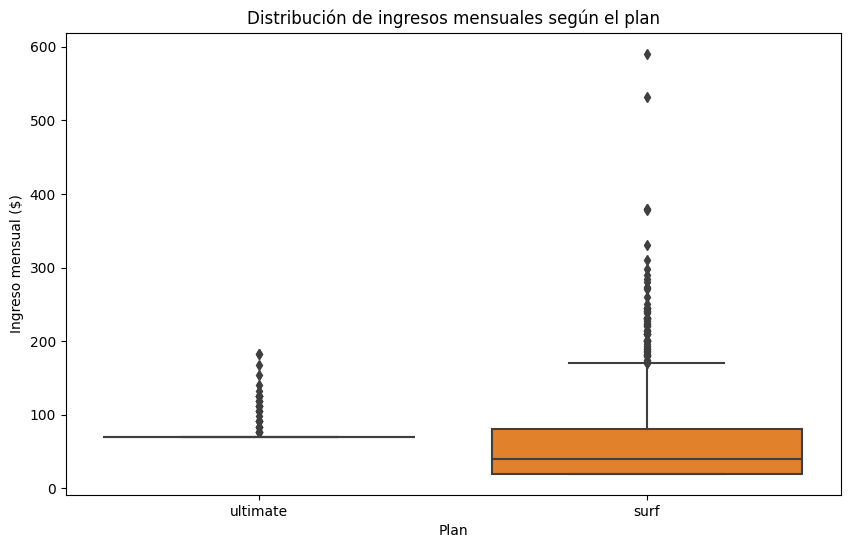

In [45]:
# Boxplot de ingresos
plt.figure(figsize=(10,6))
sns.boxplot(x='plan', y='revenue', data=user_monthly)
plt.title('Distribución de ingresos mensuales según el plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso mensual ($)')
plt.show()


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

1. **Distribución de ingresos mensuales por plan.**

- Ultimate muestra una distribución concentrada entre los 70 y 80 dólares por mes.
- Surf tiene una distribución mucho más dispersa, con:
    - Muchos usuarios pagando entre 50 y 120 dólares.
    - Algunos usuarios superando incluso los 400–600 dólares de ingresos en un solo mes.
- Se observa que Ultimate tiene menos dispersión, mientras que Surf tiene muchos usuarios generando ingresos muy altos por excedentes.

**Conclusión**:
Ultimate genera ingresos más estables y previsibles, mientras que Surf puede generar ingresos potencialmente mucho mayores en casos de consumo extremo.


2. **Distribución de ingresos mensuales según el plan.**

- Mediana de ingresos:
    - La mediana de Ultimate está alrededor de 72 dólares al mes.
    - La mediana de Surf es inferior con alrededor de 60 dólares al mes.
- Rangos:
    - Ultimate muestra un rango estrecho y controlado, con pocos valores extremos.
    - Surf muestra una gran dispersión y muchos usuarios generando entre 300 y hasta 600 dólares en ingresos.

**Conclusión**:

- Ultimate: Baja dispersión, ingresos agrupados estrechamente. Menor riesgo, ingresos consistentes.
- Surf: Alta dispersión, ingresos variables con potencial de ganancias mucho mayores. Mayor riesgo, pero también posibilidad de ingresos muy altos.


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

1. **Formular hipótesis**:

- *Hipótesis nula*: El ingreso promedio de los usuarios de Ultimate y Surf es igual.
- *Hipótesis alternativa*: El ingreso promedio de los usuarios de Ultimate y Surf es diferente.


2. **Escoger prueba estadística**:
- Usaremos una prueba t para dos muestras independientes (scipy.stats.ttest_ind).
- Asumimos varianzas desiguales (equal_var=False).


3. **Nivel de significancia**:
- Establecemos α=0.05.

In [46]:
# Prueba las hipótesis

# Crear dos muestras
surf_revenue = user_monthly[user_monthly['plan'] == 'surf']['revenue']
ultimate_revenue = user_monthly[user_monthly['plan'] == 'ultimate']['revenue']

# Prueba de hipótesis (t-test)
alpha = 0.05
results = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

print('Valor p:', results.pvalue)

# Interpretación
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula: el ingreso promedio es diferente.')
else:
    print('No podemos rechazar la hipótesis nula: no hay diferencias significativas en el ingreso promedio.')


Valor p: 3.1703905481135734e-15
Rechazamos la hipótesis nula: el ingreso promedio es diferente.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

1. **Formular hipótesis**:

- Hipótesis nula: El ingreso promedio de usuarios de NY-NJ es igual al de otras regiones.
- Hipótesis alternativa: El ingreso promedio de usuarios de NY-NJ es diferente al de otras regiones.


2. **Escoger prueba estadística**:
- Una prueba t para dos muestras independientes.


3. **Nivel de significancia**:
- Establecemos α=0.05.

Valor p: 0.5908330350763833
No podemos rechazar la hipótesis nula: no hay diferencias significativas en el ingreso promedio entre regiones.


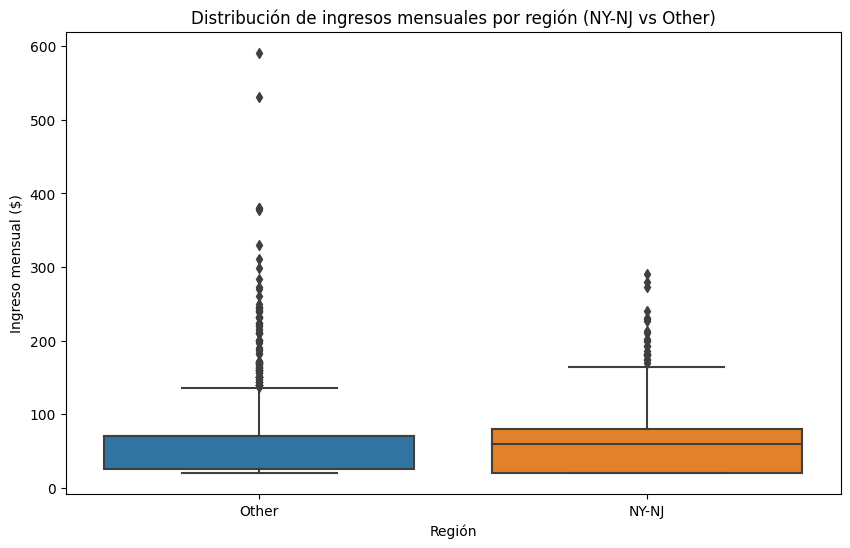

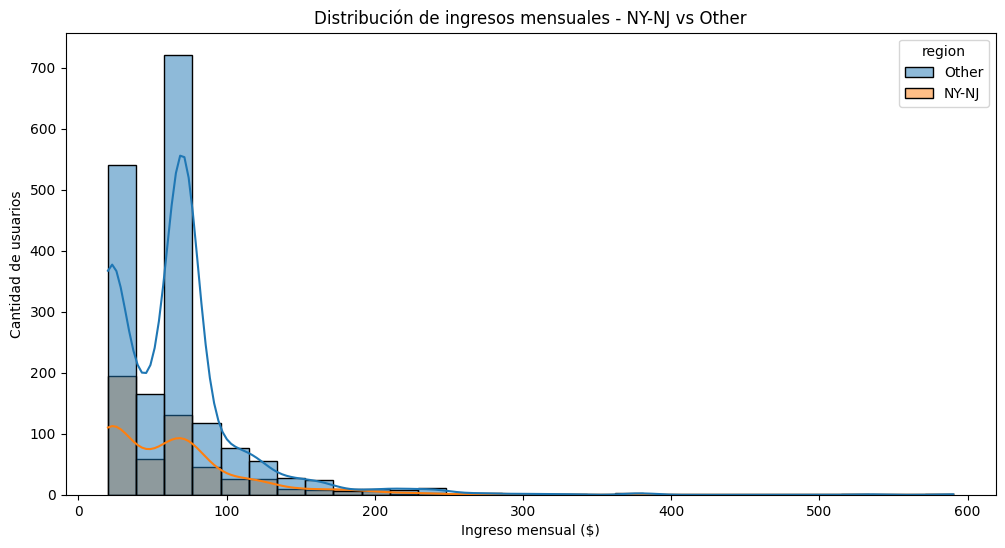

In [47]:
# Prueba las hipótesis

# Crear grupos de usuarios
ny_nj_users = users[users['city'].str.contains('New York|NY|NJ', case=False, na=False)]['user_id']
# Asegurar que tenemos solo registros de usuarios válidos
user_monthly['region'] = user_monthly['user_id'].isin(ny_nj_users).map({True: 'NY-NJ', False: 'Other'})

# Crear dos muestras
revenue_ny_nj = user_monthly[user_monthly['region'] == 'NY-NJ']['revenue']
revenue_other = user_monthly[user_monthly['region'] == 'Other']['revenue']

# Prueba de hipótesis (t-test)
results_region = st.ttest_ind(revenue_ny_nj, revenue_other, equal_var=False)

print('Valor p:', results_region.pvalue)

# Interpretación
if results_region.pvalue < alpha:
    print('Rechazamos la hipótesis nula: el ingreso promedio de NY-NJ es diferente al de otras regiones.')
else:
    print('No podemos rechazar la hipótesis nula: no hay diferencias significativas en el ingreso promedio entre regiones.')

# Boxplot de ingresos por región
plt.figure(figsize=(10,6))
sns.boxplot(x='region', y='revenue', data=user_monthly)
plt.title('Distribución de ingresos mensuales por región (NY-NJ vs Other)')
plt.xlabel('Región')
plt.ylabel('Ingreso mensual ($)')
plt.show()

# Histograma de ingresos por región
plt.figure(figsize=(12,6))
sns.histplot(data=user_monthly, x='revenue', hue='region', kde=True, bins=30)
plt.title('Distribución de ingresos mensuales - NY-NJ vs Other')
plt.xlabel('Ingreso mensual ($)')
plt.ylabel('Cantidad de usuarios')
plt.show()



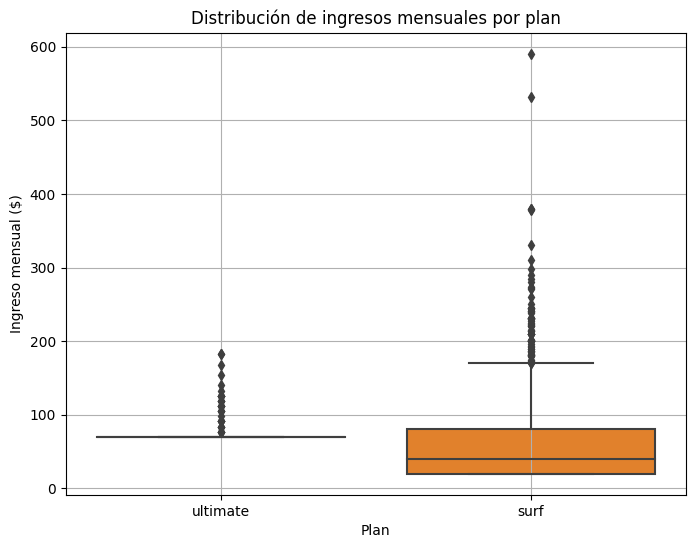

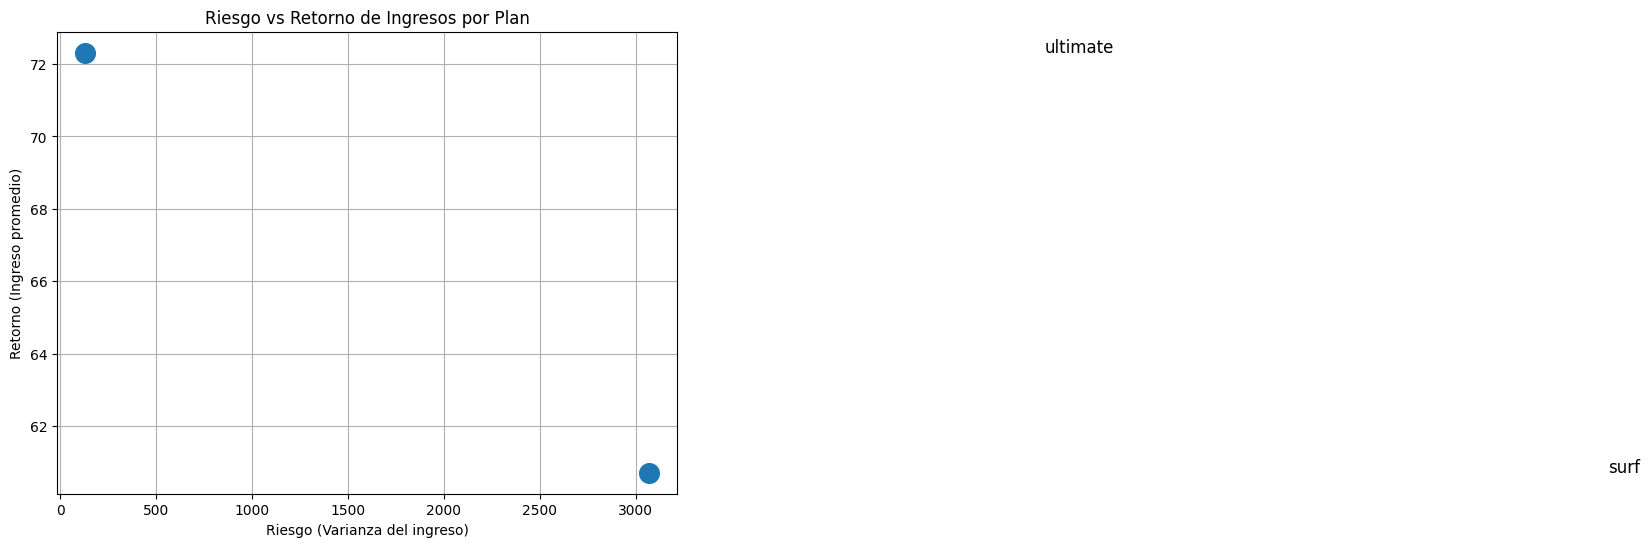

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='plan', y='revenue', data=user_monthly)
plt.title('Distribución de ingresos mensuales por plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso mensual ($)')
plt.grid(True)
plt.show()

revenue_stats = user_monthly.groupby('plan')['revenue'].agg(['mean', 'var']).reset_index()

plt.figure(figsize=(8,6))
plt.scatter(revenue_stats['var'], revenue_stats['mean'], s=200)

for i, plan in enumerate(revenue_stats['plan']):
    plt.text(revenue_stats['var'][i]+5000, revenue_stats['mean'][i], plan, fontsize=12)

plt.title('Riesgo vs Retorno de Ingresos por Plan')
plt.xlabel('Riesgo (Varianza del ingreso)')
plt.ylabel('Retorno (Ingreso promedio)')
plt.grid(True)
plt.show()



**Estos gráficos muestran**:

- Ultimate: ingresos más concentrados y predecibles. Bajo riesgo, retorno estable.
- Surf: ingresos muy dispersos, con posibilidad de ingresos extremos altos. Alto riesgo pero potencial de alto retorno (mayor ingreso promedio).

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Durante el análisis de 500 usuarios de Megaline, comparamos los planes Surf y Ultimate en cuanto a comportamiento de uso (llamadas, mensajes, internet) e ingresos generados.

Encontramos que, aunque ambos planes presentan consumos similares en llamadas e internet, Ultimate garantiza ingresos más estables mientras que Surf muestra mayor variabilidad, con algunos usuarios generando ingresos significativamente más altos debido al uso excedente.

Las pruebas estadísticas confirmaron que los ingresos promedio de Surf y Ultimate son significativamente diferentes, No existen diferencias significativas en el ingreso promedio entre usuarios de NY-NJ y otras regiones.

**Conclusión clave**:
- El plan Ultimate es ideal para maximizar ingresos constantes y controlar riesgos.
- El plan Surf ofrece una oportunidad para mayor rentabilidad si se gestiona correctamente el consumo adicional de usuarios.

Se recomienda mantener y fortalecer Ultimate como plan de estabilidad, y optimizar campañas para fomentar consumo adicional en usuarios de Surf.

***Decisiones y Supuestos Clave***

- **Conversión de datos**:
Se redondearon correctamente los minutos, gigabytes y mensajes según las condiciones del servicio.

- **Agrupación de datos**:
Se consolidaron las actividades (llamadas, SMS, Internet) por usuario y mes, calculando el consumo mensual total.

- **Enriquecimiento**:
Se calcularon minutos, mensajes y gigabytes excedentes para facturar correctamente el costo extra de cada usuario.

Corrección de cálculo de consumo de internet (redondeo tras agrupar).

- **Comparación entre planes y regiones**:
Se compararon las tarifas Surf vs Ultimate y también ingresos entre usuarios de NY-NJ y otras regiones.

- **Nivel de significancia**:
Se estableció un nivel crítico de 0.05 para todas las pruebas estadísticas.


***Conclusiones del Comportamiento de Usuario***

- **Llamadas**:
    - Ultimate: mediana mensual de aproximadamente 420 minutos.
    - Surf: mediana cercana, pero con una dispersión mayor; algunos usuarios exceden 1400 minutos.
Surf muestra mayor dispersión en minutos usados.

- **Mensajes**:
    - Uso general bajo en ambos planes.
        - Ultimate: media de 37.5 SMS/mes.
        - Surf: media de 31.2 SMS/mes.
Ultimate tiene un leve uso mayor de SMS, pero en general los mensajes no son el principal canal.

- **Internet**:
    - Ambos planes tienen un consumo promedio de datos similar (18–19 GB/mes tras corregir MB → GB).
    - Surf presenta más usuarios fuera de la media (≥ 40 GB mensuales).


***Conclusiones de Ingresos***

Ultimate genera ingresos más estables y predecibles.
Surf presenta mayor variabilidad en ingresos, con usuarios que en algunos casos generan muchísimos ingresos por excedentes.